In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
v6_e5m4 = pd.read_excel("v6_e5m4.xlsx")
v6_e1m4 = pd.read_excel("v6_e1m4.xlsx")

In [11]:
v6_e5m4.head()

,Fecha,epoch,loss,hm_loss,wh_loss,off_loss
0,2022-07-15-02-07,1,3.770489,2.829175,6.962406,0.245073
1,2022-07-15-03-40,2,3.189773,2.417131,5.347650,0.237877
2,2022-07-15-05-12,3,3.038132,2.304736,4.977507,0.235645
3,2022-07-15-06-45,4,2.953127,2.243319,4.757242,0.234083
4,2022-07-15-08-17,5,2.853761,2.167846,4.532018,0.232713


In [4]:
v6_e1m4.head()

,Fecha,epoch,loss,hm_loss,wh_loss,off_loss
0,2023-11-01-05-34,1,3.781436,2.856596,6.798751,0.244965
1,2023-11-01-07-04,2,3.222240,2.453601,5.304084,0.238231
2,2023-11-01-08-35,3,3.126087,2.384148,5.056824,0.236256
3,2023-11-01-10-06,4,2.907042,2.219749,4.536976,0.233596
4,2023-11-01-11-36,5,2.778687,2.119747,4.267445,0.232195


In [57]:
v6_f = pd.concat([v6_e5m4[0:5],v6_e1m4], axis = 0)

In [12]:
v6_f = v6_e1m4

In [13]:
v6_f

,Fecha,epoch,loss,hm_loss,wh_loss,off_loss
0,2023-11-01-05-34:,1,3.781436,2.856596,6.798751,0.244965
1,2023-11-01-07-04:,2,3.222240,2.453601,5.304084,0.238231
2,2023-11-01-08-35:,3,3.126087,2.384148,5.056824,0.236256
3,2023-11-01-10-06:,4,2.907042,2.219749,4.536976,0.233596
4,2023-11-01-11-36:,5,2.778687,2.119747,4.267445,0.232195
...,...,...,...,...,...,...
235,2023-11-18-15-25:,236,1.719047,1.292896,2.144892,0.211662
236,2023-11-18-16-56:,237,1.719675,1.293990,2.142041,0.211481
237,2023-11-18-18-28:,238,1.716408,1.291692,2.132402,0.211477
238,2023-11-18-19-59:,239,1.719553,1.294037,2.140416,0.211474


In [14]:
epocas = np.linspace(0,len(v6_f)-1,len(v6_f))

In [48]:
EpocaAP = np.array([0, 5, 6, 9, 10,11,12,13,15,20,26,30,31,32,33,34,38,44,46,48,55,60,66,72,116,141])
AP_5095=np.array([0, 11.1, 14.9, 16.8, 5.2,18.3,21.2,21.4,22.3,23.6,24.2,24.2,24.8,24.4,25.1,24.9,25.2,25.8,26.1,26.3,27.1,27.8,27.9,28.7,31.1,31.2])
AP_50=np.array([0, 21.7, 27.4, 30.3,10.9,32.5,35.8,36.1,37.2,38.8,40.0,40,40.4,40.2,40.8,40.8,41.1,41.8,42.1,42.4,43.3,44.3,44.3,45.1,48.0,48.3])
AP_95=np.array([0, 10.2, 14.7, 17.0,4.3,18.7,22.0,22.3,23.5,24.7,25.2,25.4,26.0,25.7,26.4,26.1,26.5,27.3,27.7,27.5,28.8,29.6,29.7,30.4,33.4,33.4])

In [60]:
EpocaAP = np.array([0,5,10,15,20,30,32,40,45,55,65,71,90,105,118,125,140,170,195,220,240])
AP_5095=np.array([0,13.3,18.3,20.3,21.6,25.7,26.1,27.4,27.9,28.6,29.6,30.0,30.2,32.1,32.4,32.4,32.4,32.5,32.5,32.5,32.5])
AP_50=np.array([0,24.7,32.5,35.2,36.1,41.3,41.6,43.2,43.8,44.7,45.7,46.4,46.6,48.8,49.2,49.0,49.1,49.2,49.2,49.2,49.1])
AP_95=np.array([0,13.2,18.7,21.3,22.8,27.1,28.7,29.3,29.9,30.6,31.5,32.1,32.3,34.8,35.0,35.2,35.0,35.3,35.3,35.2,35.2])

In [50]:
EpocaAP[8]

15

In [51]:
AP_5095[8]

22.3

In [52]:
AP_50[8]

37.2

In [53]:
AP_95[8]

23.5

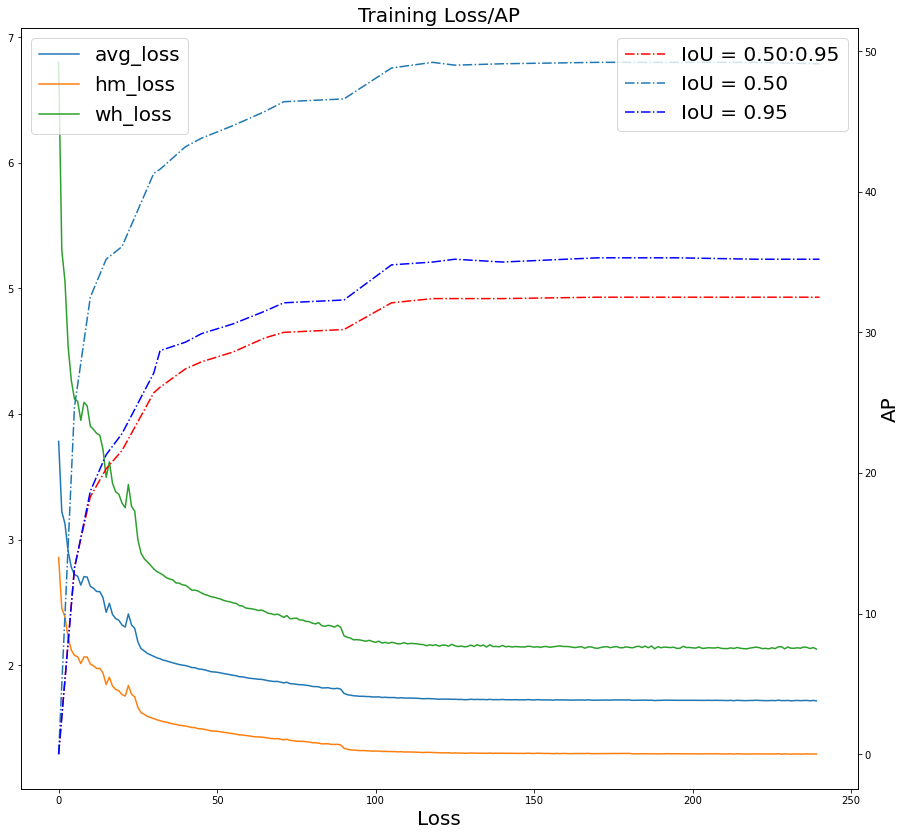

In [63]:
fig, ax1 = plt.subplots(figsize=(15,14))
ax2 = ax1.twinx()
plt.title("Training Loss/AP", fontsize=20)
plt.xlabel("Epoca",fontsize=20)
ax1.set_xlabel("Loss",fontsize=20)
ax2.set_ylabel("AP",fontsize=20)
ax1.plot(epocas,v6_f['loss'], label = 'avg_loss')
ax1.plot(epocas,v6_f['hm_loss'], label = 'hm_loss')
ax1.plot(epocas,v6_f['wh_loss'], label = 'wh_loss')
ax2.plot(EpocaAP, AP_5095, 'r-.', label = 'IoU = 0.50:0.95')
ax2.plot(EpocaAP, AP_50, '-.', label = 'IoU = 0.50')
ax2.plot(EpocaAP, AP_95, 'b-.', label = 'IoU = 0.95')
ax1.legend(loc='upper left',prop={'size': 20})
ax2.legend(loc='upper right',prop={'size': 20})

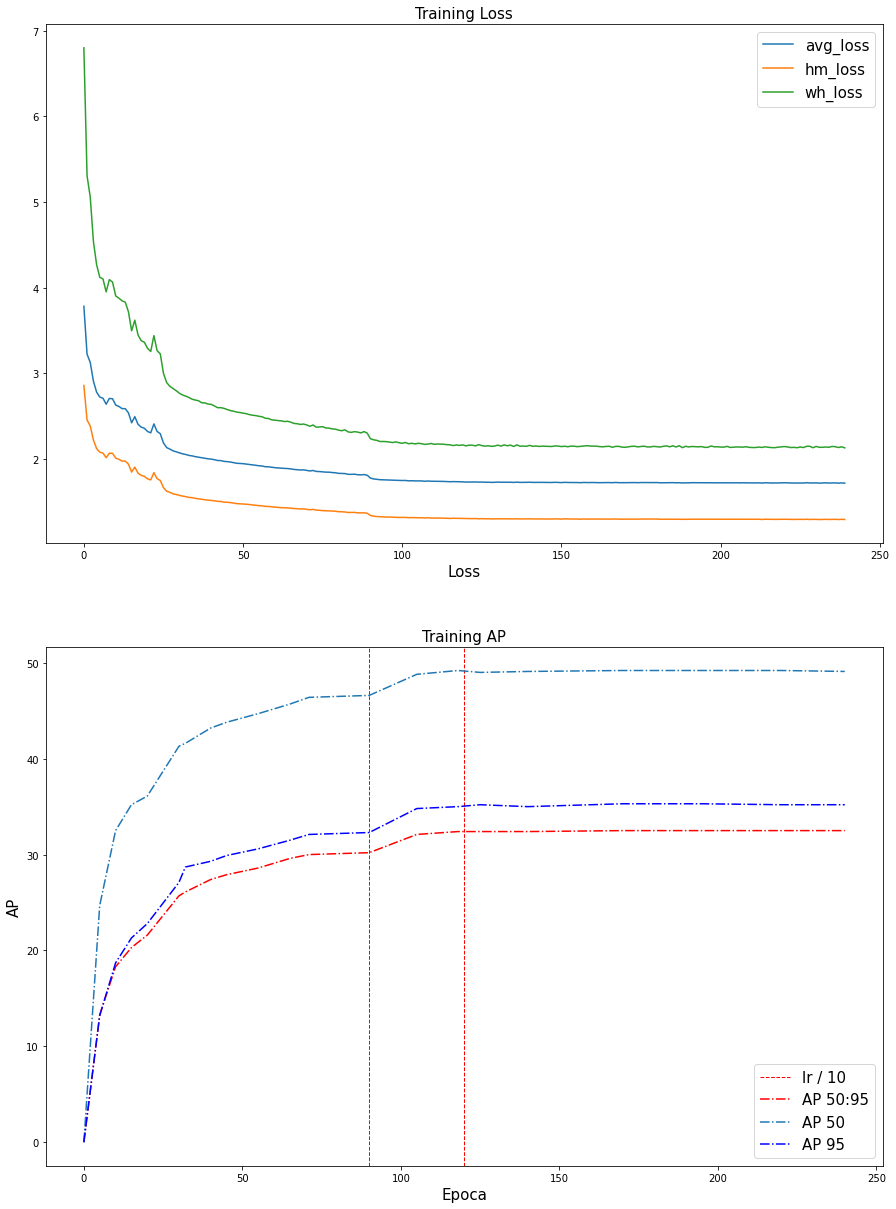

In [62]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,21))
ax1.set_title("Training Loss", fontsize=15)
ax2.set_title("Training AP", fontsize=15)
plt.xlabel("Epoca",fontsize=15)
ax1.set_xlabel("Loss",fontsize=15)
ax2.set_ylabel("AP",fontsize=15)
ax1.plot(epocas,v6_f['loss'], label = 'avg_loss')
ax1.plot(epocas,v6_f['hm_loss'], label = 'hm_loss')
ax1.plot(epocas,v6_f['wh_loss'], label = 'wh_loss')
ax2.axvline(90, color = "red", linewidth = 1, linestyle = "dashed", label = "lr / 10");
ax2.axvline(120, color = "red", linewidth = 1, linestyle = "dashed");
ax2.plot(EpocaAP, AP_5095, 'r-.', label = 'AP 50:95')
ax2.plot(EpocaAP, AP_50, '-.', label = 'AP 50')
ax2.plot(EpocaAP, AP_95, 'b-.', label = 'AP 95')
ax1.legend(loc='upper right',prop={'size': 15})
ax2.legend(loc='lower right',prop={'size': 15})

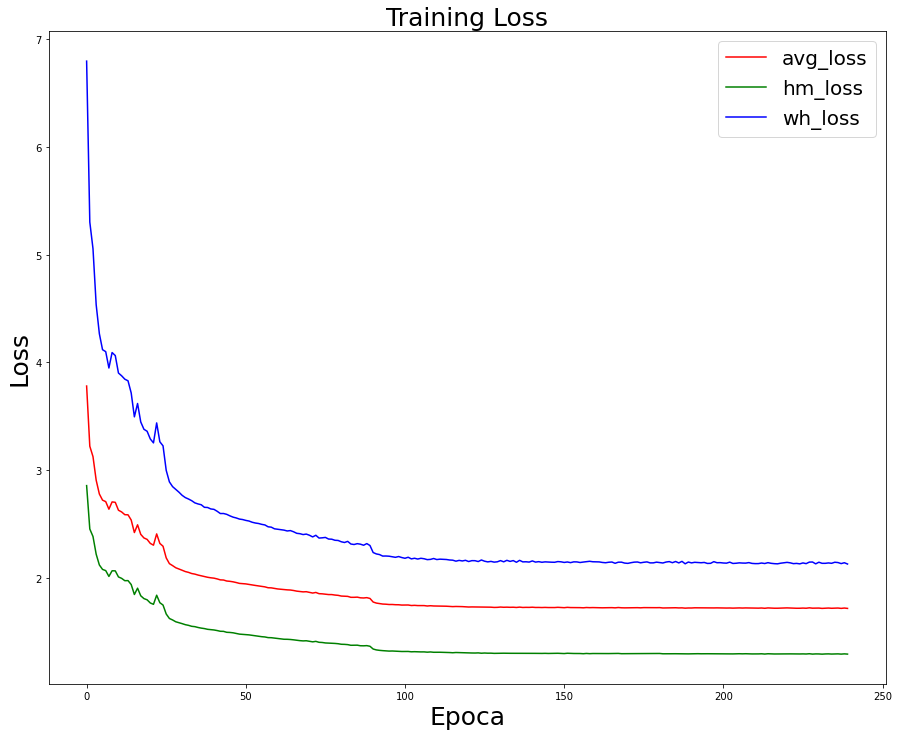

In [64]:
fig, ax1 = plt.subplots(figsize=(15,12))
plt.title("Training Loss", fontsize=25)
plt.xlabel("Epoca",fontsize=25)
ax1.set_ylabel("Loss",fontsize=25)
ax1.plot(epocas,v6_f['loss'],'r', label = 'avg_loss')
ax1.plot(epocas,v6_f['hm_loss'],'g', label = 'hm_loss')
ax1.plot(epocas,v6_f['wh_loss'],'b', label = 'wh_loss')
ax1.legend(loc='upper right',prop={'size': 20})

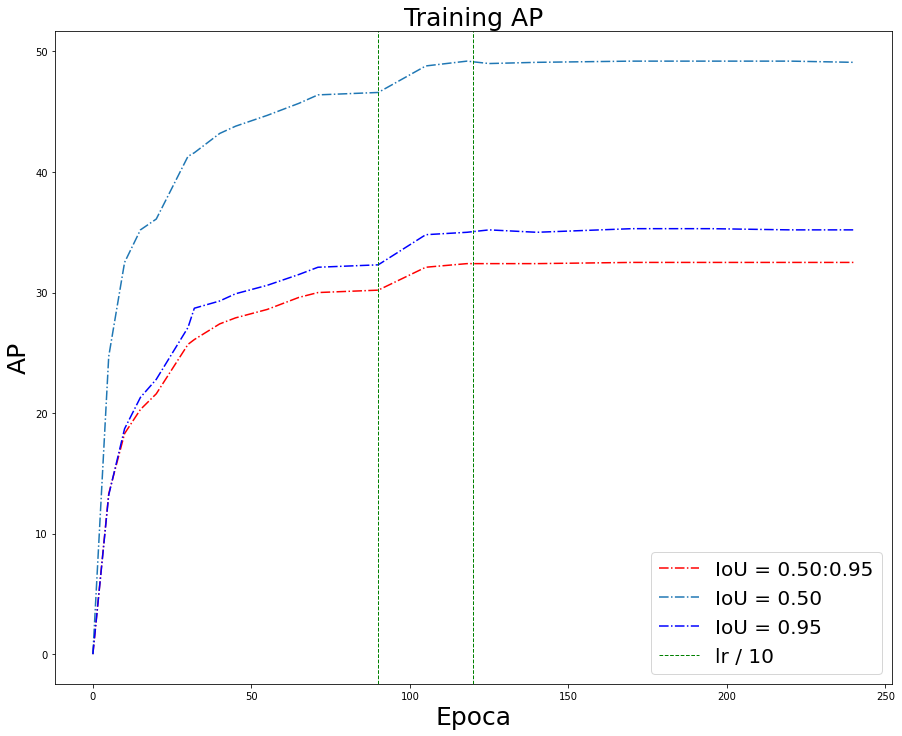

In [67]:
fig, ax1 = plt.subplots(figsize=(15,12))
plt.title("Training AP", fontsize=25)
plt.xlabel("Epoca",fontsize=25)
ax1.set_ylabel("AP",fontsize=25)
ax1.plot(EpocaAP, AP_5095, 'r-.', label = 'IoU = 0.50:0.95')
ax1.plot(EpocaAP, AP_50, '-.', label = 'IoU = 0.50')
ax1.plot(EpocaAP, AP_95, 'b-.', label = 'IoU = 0.95')
ax1.axvline(90, color = "green", linewidth = 1, linestyle = "dashed", label = "lr / 10");
ax1.axvline(120, color = "green", linewidth = 1, linestyle = "dashed");
ax1.legend(loc='lower right',prop={'size': 20})

In [195]:
epocas = np.array(range(10))
LossV7=np.array([5.353469,4.468390,3.945542,4.710706,5.662189,5.606491,5.759494,5.648704, 6.326960,6.096097])
ss=np.array([2.250095, 1.727743, 1.446740, 1.827113, 2.277730, 2.235451,2.304973 ,2.246037 ,2.588621,2.471937])
hm=np.array([2.059716,1.877131,1.735778, 1.942661, 2.231385, 2.220205, 2.257295, 2.237549, 2.393876, 2.345271])
wh=np.array([7.967905, 6.226241, 5.252826, 7.006635, 9.085526, 9.062017, 9.517540, 9.195774, 10.968165, 10.314925])

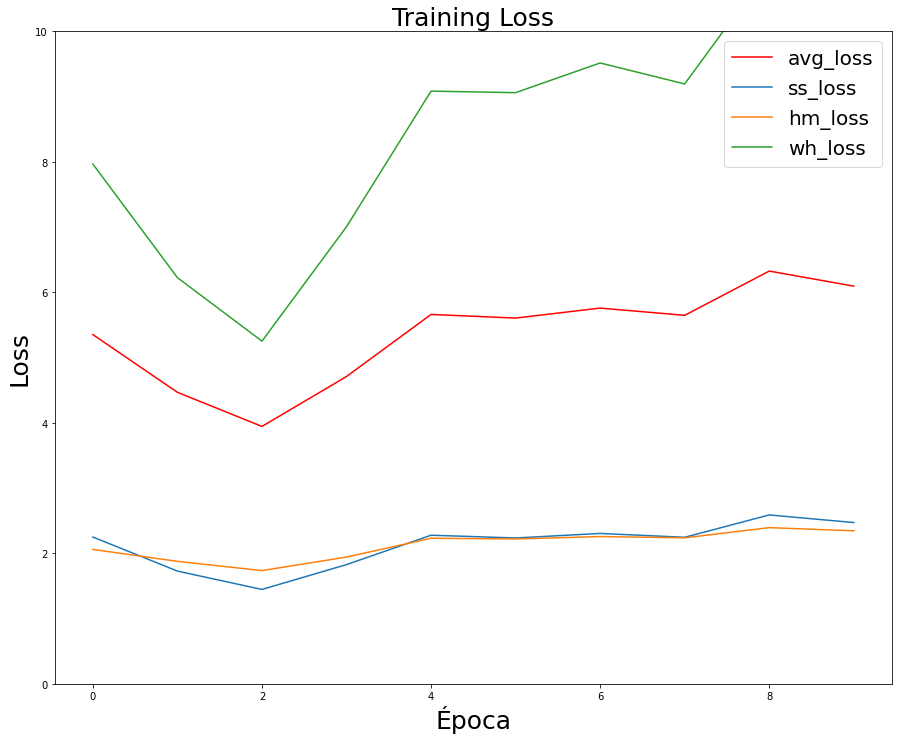

In [200]:
fig, ax1 = plt.subplots(figsize=(15,12))
plt.title("Training Loss", fontsize=25)
plt.xlabel("Época",fontsize=25)
ax1.set_ylabel("Loss",fontsize=25)
plt.ylim([0,10])
ax1.plot(epocas,LossV7,'r', label = 'avg_loss')
ax1.plot(epocas,ss, label = 'ss_loss')
ax1.plot(epocas,hm, label = 'hm_loss')
ax1.plot(epocas,wh, label = 'wh_loss')
ax1.legend(loc='upper right',prop={'size': 20})